<a href="https://colab.research.google.com/github/ysu7120/ysu7120/blob/Convolutional-LSTM-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%BB%B4%ED%93%A8%ED%84%B0-%EB%B9%84%EC%A0%84-%EC%84%BC%EC%84%9C-%EA%B8%B0%EB%B0%98-%EC%82%AC%EA%B1%B0%EB%A6%AC-%EA%B5%90%ED%86%B5%EC%B2%B4%EC%A6%9D-%EC%98%88%EC%B8%A1-%EC%8B%9C%EC%8A%A4%ED%85%9C/Trafic_%ED%95%99%EC%8A%B5%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os,sys
import numpy as np
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *

#원본데이터

In [ ]:
# csv 파일을 데이터프레임으로 바꾸기 
# 인코딩 : UnicodeDecodeError가 발생하면 encoding을 바꿔볼것
# utf-8, euc-kr, cp949
# 파일을 인덱스로 지정
df = pd.read_csv("/content/drive/MyDrive/test.csv", encoding='utf-8')
df

,일자,시간,지점명,지점번호,방향,구분,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,20210101(금)~20210107(목),0시,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,209,296,344,182,297,189,258
1,20210101(금)~20210107(목),1시,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,98,209,213,106,274,135,146
2,20210101(금)~20210107(목),2시,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,116,150,160,120,150,103,107
3,20210101(금)~20210107(목),3시,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,97,143,140,106,110,90,84
4,20210101(금)~20210107(목),4시,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,224,218,215,190,143,130,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,20210122(금)~20210128(목),19시,성산로(금화터널),A-01,유출,독립문역->봉원고가차도,1949,2116,1953,1483,2179,1197,1014
188,20210122(금)~20210128(목),20시,성산로(금화터널),A-01,유출,독립문역->봉원고가차도,1680,1677,1940,1480,1776,1213,1019
189,20210122(금)~20210128(목),21시,성산로(금화터널),A-01,유출,독립문역->봉원고가차도,1633,1593,1692,1393,1817,1129,906
190,20210122(금)~20210128(목),22시,성산로(금화터널),A-01,유출,독립문역->봉원고가차도,850,1048,1042,927,1140,736,625


In [ ]:
# 컬럼명 확인
df.columns 

Index(['일자', '시간', '지점명', '지점번호', '방향', '구분', 'Mon', 'Tue', 'Wed', 'Thu',
       'Fri', 'Sat', 'Sun'],
      dtype='object')

### 20210104 (월) 데이터그래프

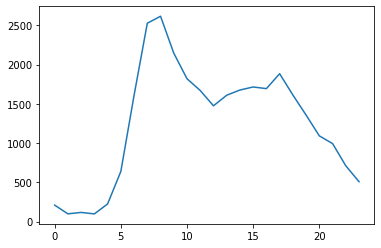

In [ ]:
df_s=df.loc[:, ['일자','시간', '방향','Mon', 'Tue', 'Wed', 'Thu',
       'Fri', 'Sat', 'Sun']]
df_s=df_s[df_s['일자']=='20210101(금)~20210107(목)']
df1=df_s[df_s['방향'] == '유입']
df_m=df1.loc[:, ['Mon']]
df_m.rename(columns={'Mon':'Trafic'},inplace = True)
df_m

population = df_m['Trafic']
population.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.plot(population)

#데이터셋 제작
### 1월 4주간 24시간 성산로(금화터널) 차량유입 데이터

In [ ]:
df_s=df.loc[:, ['시간', '방향','Mon', 'Tue', 'Wed', 'Thu',
       'Fri', 'Sat', 'Sun']]
df1=df_s[df_s['방향'] == '유입']
df1

,시간,방향,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,0시,유입,209,296,344,182,297,189,258
1,1시,유입,98,209,213,106,274,135,146
2,2시,유입,116,150,160,120,150,103,107
3,3시,유입,97,143,140,106,110,90,84
4,4시,유입,224,218,215,190,143,130,101
...,...,...,...,...,...,...,...,...,...
91,19시,유입,1298,1368,1534,1310,1465,1083,878
92,20시,유입,1078,1142,1151,1041,1217,955,868
93,21시,유입,1108,1082,1121,1001,1127,991,730
94,22시,유입,807,815,902,796,998,695,595


In [ ]:
df_m=df1.loc[:, ['Mon']]
df_m.rename(columns={'Mon':'Trafic'},inplace = True)
df_t=df1.loc[:, ['Tue']]
df_t.rename(columns={'Tue':'Trafic'},inplace = True)
df_w=df1.loc[:, ['Wed']]
df_w.rename(columns={'Wed':'Trafic'},inplace = True)
df_th=df1.loc[:, ['Thu']]
df_th.rename(columns={'Thu':'Trafic'},inplace = True)
df_f=df1.loc[:, ['Fri']]
df_f.rename(columns={'Fri':'Trafic'},inplace = True)
df_sa=df1.loc[:, ['Sat']]
df_sa.rename(columns={'Sat':'Trafic'},inplace = True)
df_su=df1.loc[:, ['Sun']]
df_su.rename(columns={'Sun':'Trafic'},inplace = True)

In [ ]:
new_df = pd.concat([df_m, df_t, df_w, df_th, df_f, df_sa, df_su], ignore_index = True)
new_df

,Trafic
0,209
1,98
2,116
3,97
4,224
...,...
667,878
668,868
669,730
670,595


In [ ]:
df = new_df

##모델에 입력시작

###단일특성 데이터 정제함수

In [ ]:
def univeriate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [ ]:
#### 학습값 지정 및 랜덤시드 선택
TRAIN_SPLIT = 624
tf.random.set_seed(13)

In [ ]:
###총인구수 데이터 저장
uni_data = df['Trafic']
uni_data.index = df['Trafic']
uni_data.head()

Trafic
209    209
98      98
116    116
97      97
224    224
Name: Trafic, dtype: int64

In [ ]:
# 데이터 정규화
uni_data = uni_data.values

In [ ]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [ ]:
####train val 데이터 정제
univariate_past_history = 24
univariate_future_target = 0

x_train_uni, y_train_uni = univeriate_data(uni_data, 0, TRAIN_SPLIT, 
                                           univariate_past_history, univariate_future_target)

x_val_uni, y_val_uni = univeriate_data(uni_data, TRAIN_SPLIT, None, 
                                       univariate_past_history, univariate_future_target)

In [ ]:
print('Single window of past history')
print(x_train_uni[0])
print('\n target temperature to predict')
print(y_train_uni[0])

Single window of past history
[[-1.30281798]
 [-1.45833062]
 [-1.43311235]
 [-1.45973163]
 [-1.28180276]
 [-0.70178266]
 [ 0.65580063]
 [ 1.94333319]
 [ 2.0680235 ]
 [ 1.40954657]
 [ 0.95281576]
 [ 0.74266355]
 [ 0.46946567]
 [ 0.65860266]
 [ 0.75106964]
 [ 0.80570921]
 [ 0.7762879 ]
 [ 1.0424807 ]
 [ 0.66280571]
 [ 0.30414593]
 [-0.06712298]
 [-0.20442242]
 [-0.60090959]
 [-0.88531559]]

 target temperature to predict
-1.3000159524469324


In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

In [ ]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i :
      plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
    else :
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.axis('auto')
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

###BASELINE 모델 그래프

In [ ]:
####회귀모델의 베이스라인 모델 = MAE값
def baseline(history):
  return np.mean(history)

In [ ]:
#plot data값 지정
b=[x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])]
b

[array([[-1.30281798],
        [-1.45833062],
        [-1.43311235],
        [-1.45973163],
        [-1.28180276],
        [-0.70178266],
        [ 0.65580063],
        [ 1.94333319],
        [ 2.0680235 ],
        [ 1.40954657],
        [ 0.95281576],
        [ 0.74266355],
        [ 0.46946567],
        [ 0.65860266],
        [ 0.75106964],
        [ 0.80570921],
        [ 0.7762879 ],
        [ 1.0424807 ],
        [ 0.66280571],
        [ 0.30414593],
        [-0.06712298],
        [-0.20442242],
        [-0.60090959],
        [-0.88531559]]), -1.3000159524469324, 0.16030841808293905]

-1.3000159524469324
0.16030841808293905


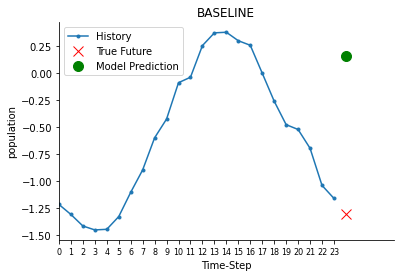

In [ ]:
#def show_plot(plot_data, delta, title):
#([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])]
labels = ['History', 'True Future', 'Model Prediction']
marker = ['.-', 'rx', 'go']
time_steps = create_time_steps(b[0].shape[0])
arr=[]

True_F = b[1]
Model_P = b[2]

if 0:
  future = 0
else:
  future = 0

plt.title("BASELINE")
for i, x in enumerate(b):
  if i == 1 :
    b[i]=uni_data[24]
    plt.plot(future, b[i], marker[i], markersize=10, label=labels[i])
    print(b[1])
  elif i == 2 :
    b[i]=(Model_P * b[1]) / True_F
    plt.plot(future, b[i], marker[i], markersize=10, label=labels[i])
    print(b[2])
  else :
    for j in range(TRAIN_SPLIT,TRAIN_SPLIT+24):
      arr.append(uni_data[j])
    for k in range(0,24):
      b[0][k]=arr[k]
    plt.plot(time_steps, b[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.axis('auto')
  plt.xlim([time_steps[0], (future+2)*2])
  TIME=time_steps
  values = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'] 
  plt.xticks(TIME,values,fontsize=8)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.ylabel('population')
  plt.xlabel('Time-Step')

#LSTM 모델제작

In [ ]:
train_univariate=tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))

In [ ]:
BATCH_SIZE = 256
BUFFER_SIZE=10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [ ]:
#귀찮아서 단일신경망으로 제작
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(9, input_shape = x_train_uni.shape[-2:]), tf.keras.layers.Dense(1)
])
simple_lstm_model.summary()
simple_lstm_model.compile(optimizer='adam', loss='mae')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 9)                 396       
                                                                 
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## 24시간씩 1개의 특성(차량이동)으로 분할하여 학습
for x, y in val_univariate.take(1):
  print(simple_lstm_model.predict(x).shape)

1/1 [==============================] - 5s 5s/step
(24, 1)


In [ ]:
EVALUATION_INTERVAL = 200
EPOCHS = 30

f1=simple_lstm_model.fit(train_univariate,
                      epochs=EPOCHS,
                      steps_per_epoch = EVALUATION_INTERVAL,
                      validation_data = val_univariate,
                      validation_steps = 50)

Epoch 1/30
200/200 [==============================] - 2s 8ms/step - loss: 0.0967 - val_loss: 0.0654
Epoch 2/30
200/200 [==============================] - 2s 9ms/step - loss: 0.0959 - val_loss: 0.0660
Epoch 3/30
200/200 [==============================] - 1s 5ms/step - loss: 0.0948 - val_loss: 0.0638
Epoch 4/30
200/200 [==============================] - 1s 5ms/step - loss: 0.0941 - val_loss: 0.0655
Epoch 5/30
200/200 [==============================] - 1s 5ms/step - loss: 0.0934 - val_loss: 0.0659
Epoch 6/30
200/200 [==============================] - 1s 5ms/step - loss: 0.0930 - val_loss: 0.0633
Epoch 7/30
200/200 [==============================] - 1s 5ms/step - loss: 0.0918 - val_loss: 0.0647
Epoch 8/30
200/200 [==============================] - 1s 5ms/step - loss: 0.0913 - val_loss: 0.0621
Epoch 9/30
200/200 [==============================] - 1s 5ms/step - loss: 0.0906 - val_loss: 0.0634
Epoch 10/30
200/200 [==============================] - 1s 5ms/step - loss: 0.0899 - val_loss: 0.0656

#####여기아래는 다른 회귀모델 그냥 궁금해서 넣어논거임

In [ ]:
from keras.layers import RNN
model = Sequential()
model.add(Dense(9, activation = 'relu', input_shape = x_train_uni.shape[-2:]))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', loss='mae')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24, 9)             18        
                                                                 
 dense_2 (Dense)             (None, 24, 1)             10        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

f2=model.fit(train_univariate,
                      epochs=EPOCHS,
                      steps_per_epoch = EVALUATION_INTERVAL,
                      validation_data = val_univariate,
                      validation_steps = 50)

Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 0.9045 - val_loss: 0.8003
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8981 - val_loss: 0.8009
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8978 - val_loss: 0.8001
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8979 - val_loss: 0.8007
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8978 - val_loss: 0.8007
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8980 - val_loss: 0.8009
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8976 - val_loss: 0.8020
Epoch 8/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8982 - val_loss: 0.8012
Epoch 9/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8976 - val_loss: 0.8010
Epoch 10/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8978 - val_loss: 0.8017

In [ ]:
model2 = tf.keras.Sequential([tf.keras.layers.SimpleRNN(units=9,return_sequences=False,
                                                    input_shape = x_train_uni.shape[-2:]),
                                                    tf.keras.layers.Dense(1)])
model2.compile(optimizer='adam', loss='mse')
f3 = model.fit(train_univariate,
                      epochs=EPOCHS,
                      steps_per_epoch = EVALUATION_INTERVAL,
                      validation_data = val_univariate,
                      validation_steps = 50)

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.8980 - val_loss: 0.8014
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8976 - val_loss: 0.8011
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8978 - val_loss: 0.8008
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8977 - val_loss: 0.8014
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8977 - val_loss: 0.8009
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8979 - val_loss: 0.8015
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8977 - val_loss: 0.8015
Epoch 8/10
185/200 [==========================>...] - ETA: 0s - loss: 0.8980

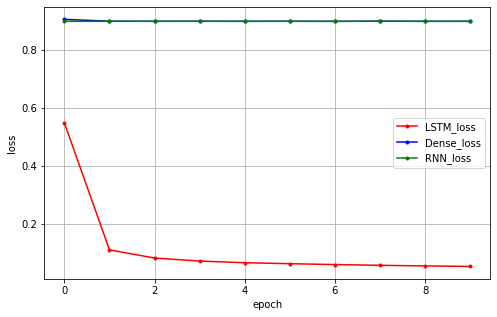

In [ ]:
#결과를 그래프로 표현하는 부분입니다.
lstm= f1.history['loss']
dense = f2.history['loss']
rnn = f3.history['loss']

x_len = np.arange(len(rnn))  

plt.figure(figsize=(8, 5))
plt.plot(x_len, lstm, marker='.', c="red", label='LSTM_loss')
plt.plot(x_len, dense, marker='.', c="blue", label='Dense_loss')
plt.plot(x_len, rnn, marker='.', c="green", label='RNN_loss')

plt.legend(loc='right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

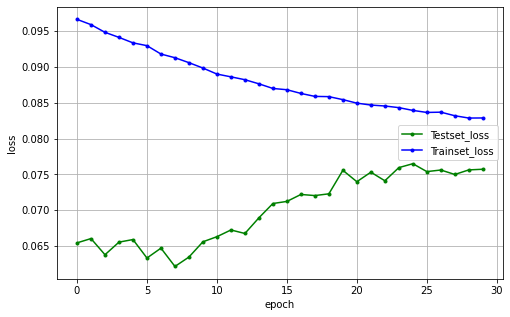

In [ ]:
#결과를 그래프로 표현하는 부분
y_vloss = f1.history['val_loss']
y_loss = f1.history['loss']

x_len = np.arange(len(y_loss))  

plt.figure(figsize=(8, 5))
plt.plot(x_len, y_vloss, marker='.', c="green", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

1/1 [==============================] - 0s 20ms/step


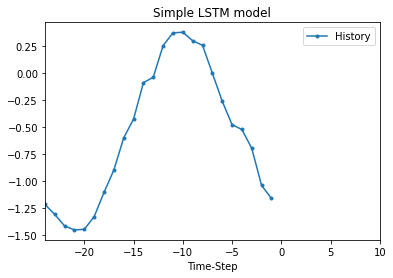

1/1 [==============================] - 0s 21ms/step


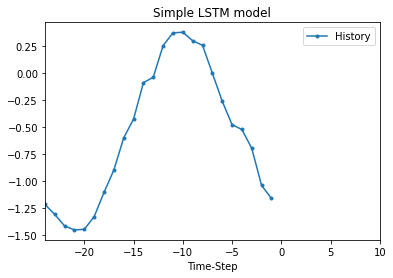

1/1 [==============================] - 0s 16ms/step


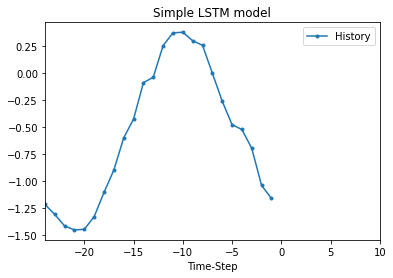

In [ ]:
for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(), simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

###여기서부터 반드시 실행해야 그래프 잘나옴

In [ ]:
a = simple_lstm_model.predict(x)
a = [x[0].numpy(), y[0].numpy(), a[0]]
a

1/1 [==============================] - 0s 18ms/step


[array([[-1.21315304],
        [-1.30562001],
        [-1.41209713],
        [-1.44852352],
        [-1.44291946],
        [-1.32523422],
        [-1.10107186],
        [-0.89372168],
        [-0.59670655],
        [-0.42298072],
        [-0.08673718],
        [-0.03630065],
        [ 0.25651143],
        [ 0.37419667],
        [ 0.37980073],
        [ 0.3013439 ],
        [ 0.25931346],
        [ 0.00152675],
        [-0.25766098],
        [-0.47481827],
        [-0.51965074],
        [-0.69337657],
        [-1.03662518],
        [-1.15711245]]),
 -1.1683205662974525,
 array([-1.2817124], dtype=float32)]

In [ ]:
uni_data = df['Trafic']
uni_data.index = df['Trafic']
uni_data.head()

Trafic
209    209
98      98
116    116
97      97
224    224
Name: Trafic, dtype: int64

In [ ]:
uni_data = uni_data.values

In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

1140
[1250.6432]


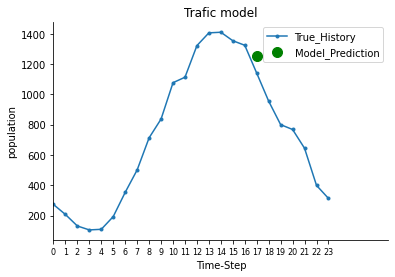

In [ ]:
#def show_plot(plot_data, delta, title):
labels = ['True_History', 'True Future', 'Model_Prediction']
marker = ['.-', 'rx', 'go']
time_steps = create_time_steps(a[0].shape[0])
arr=[]

True_F = a[1]
Model_P = a[2]

if 0:
    future = 0
else:
  future = 0

plt.title("Trafic model")
for i, x in enumerate(a):
  if i == 1 :
    a[i]=uni_data[TRAIN_SPLIT+17]
    #plt.plot(-3, a[i], marker[i], markersize=10, label=labels[i])
    print(a[1])
  elif i == 2 :
    a[i]=(Model_P * a[1]) / True_F
    plt.plot(-7, a[i], marker[i], markersize=10, label=labels[i])
    print(a[2])
  else :
    for j in range(TRAIN_SPLIT,TRAIN_SPLIT+24):
      arr.append(uni_data[j])
    for k in range(0,24):
      a[0][k]=arr[k]
    plt.plot(time_steps , a[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.axis('auto')
  plt.xlim([time_steps[0], (future+2)*2])
  TIME=time_steps
  values = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'] 
  plt.xticks(TIME,values,fontsize=8)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.ylabel('population')
  plt.xlabel('Time-Step')

In [ ]:
k=abs(a[1]-a[2][0])
result=(k/a[1])*100
print("오차율:",result)

오차율: 9.705542848821272
